In [1]:
import tensorflow as tf
from  tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


import PIL
import os


plt.style.use('fivethirtyeight')
import pathlib

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [2]:
fruit = tf.keras.preprocessing.image_dataset_from_directory("./fruits/")

Found 12654 files belonging to 5 classes.


In [ ]:
(train_images, train_labels),(test_images,test_labels) = fruit.load_data()

In [3]:
class_names = fruit.class_names

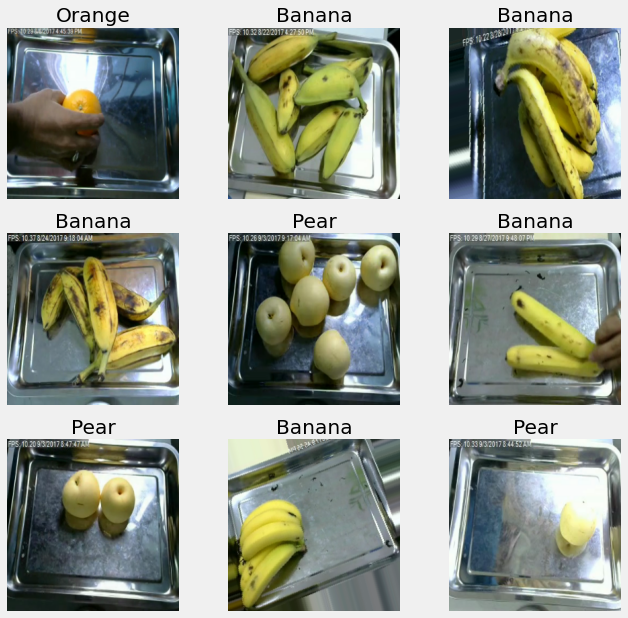

In [4]:
plt.figure(figsize=(10,10))

for images, labels in fruit.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [5]:
batch_size = 32
img_height = 224
img_width = 224

In [6]:
train_fruit = tf.keras.preprocessing.image_dataset_from_directory(
  './fruits/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12654 files belonging to 5 classes.
Using 10124 files for training.


In [7]:
val_fruit = tf.keras.preprocessing.image_dataset_from_directory(
  './fruits/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12654 files belonging to 5 classes.
Using 2530 files for validation.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_fruit = train_fruit.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_fruit = val_fruit.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [1]:
model.fit( train_fruit,
  validation_data=val_fruit,
  epochs=5
)

NameError: name 'model' is not defined

In [70]:
apple_path = "./fruits/pear-fruit_1200.jpg"

In [71]:
apple = image.load_img(apple_path, target_size =(224,224))

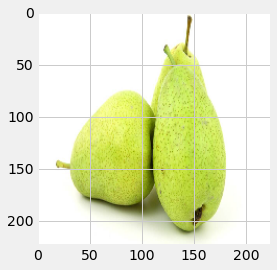

In [72]:
plt.imshow(apple)

In [73]:
apple_array = image.img_to_array(apple)

In [74]:
apple_batch = np.expand_dims(apple_array, axis = 0)

In [75]:
apple_preprocessed = preprocess_input(apple_batch)


In [76]:
prediction = model.predict(apple_preprocessed)

In [77]:
score = tf.nn.softmax(prediction[0])

In [78]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Banana with a 100.00 percent confidence.
